In [ ]:
# IMPORTING ALL THE NECESSARY LIBRARIES

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import string
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import scipy.stats as stats

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# FIRST GLIMPSE OF THE DATA
df = pd.read_csv('McDonald_s_Reviews.csv', encoding="ISO-8859-1")
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [ ]:
# PERFORMING INITIAL INSPECTION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [ ]:
# RATING COLUMN IS OF TYPE OBJECT. CONVERTING THAT TO NUMBERS
df['rating'].unique()

array(['1 star', '4 stars', '5 stars', '2 stars', '3 stars'], dtype=object)

In [ ]:
df['rating'] = df['rating'].apply(lambda x: int(x[0]))

In [ ]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1


In [ ]:
# ANALYSING FOR THE LENGTH OF THE DATAFRAME
print('Number of unique values in each columns')
for column in list(df.columns):
    print(f'{column} : {df[column].nunique()}')

Number of unique values in each columns
reviewer_id : 33396
store_name : 2
category : 1
store_address : 40
latitude  : 39
longitude : 39
rating_count : 51
review_time : 39
review : 22285
rating : 5


In [ ]:
# DROPPING THE UNNECESSARY COLUMNS
df.drop(columns = ['reviewer_id','store_name','category','store_address','latitude ','longitude','review_time','rating_count'], axis = 1, inplace = True)

In [ ]:
df.head()

,review,rating
0,Why does it look like someone spit on my food?...,1
1,It'd McDonalds. It is what it is as far as the...,4
2,Made a mobile order got to the speaker and che...,1
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,"I repeat my order 3 times in the drive thru, a...",1


In [ ]:
# DATA CLEANING

def cleanText(text):

    # REMOVING PUNCTUATIONS
    text = text.translate(str.maketrans('', '', string.punctuation))

    # REMOVING NON ALPHA-NUMERIC CHARACTERS
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # CONVERTING TEXT TO LOWER CASE
    text = text.lower()

    # TOKENIZING THE TEXT
    words = text.split()

    # PERFORMING LEMMATIZATION
    lemma = WordNetLemmatizer()
    words = [lemma.lemmatize(word) for word in words]

    # STEMMING
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # REMOVING STOPWORDS
    stopWords = set(stopwords.words('english'))
    words = [word for word in words if word not in stopWords]

    return " ".join(words)

# CREATING A COLUMN AND ADDING BACK
df['cleanReview'] = df['review'].apply(cleanText)


In [ ]:
# DATA CLEANING

def cleanText(text):

    # REMOVING NON ALPHA-NUMERIC CHARACTERS
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# CREATING A COLUMN AND ADDING BACK
df['reviewForBERT'] = df['review'].apply(cleanText)


In [ ]:
df.head()

,review,rating,cleanReview,reviewForBERT
0,Why does it look like someone spit on my food?...,1,whi doe look like someon spit food normal tran...,Why does it look like someone spit on my food\...
1,It'd McDonalds. It is what it is as far as the...,4,itd mcdonald far food atmospher go staff doe m...,Itd McDonalds It is what it is as far as the f...
2,Made a mobile order got to the speaker and che...,1,made mobil order got speaker check line wa mov...,Made a mobile order got to the speaker and che...
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,mc crispi chicken sandwich wa custom servic wa...,My mc Crispy chicken sandwich was customer se...
4,"I repeat my order 3 times in the drive thru, a...",1,repeat order 3 time drive thru still manag mes...,I repeat my order 3 times in the drive thru an...


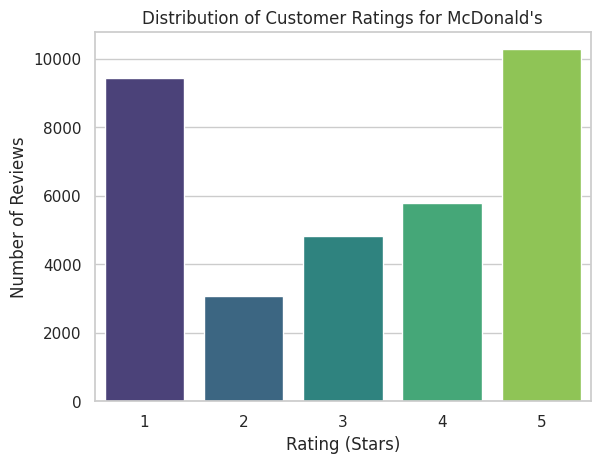

In [ ]:
# VIISUALIZING TO GET TO KNOW THE DATA MORE
sns.set(style="whitegrid")
sns.countplot(x='rating', data=df, palette="viridis")
plt.title('Distribution of Customer Ratings for McDonald\'s')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.show()

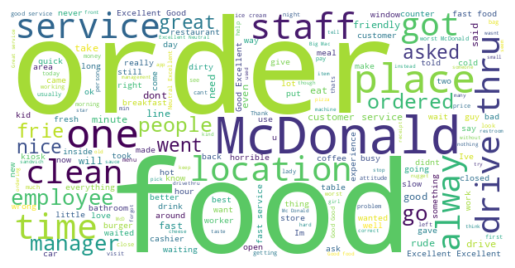

In [ ]:
# FUNCTION TO CREATE WORD CLOUD
def createWordCloud(text):
    wordcloud = WordCloud(width=600, height=300, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

textForWordCloud = ' '.join(review for review in df['reviewForBERT'])
createWordCloud(textForWordCloud)

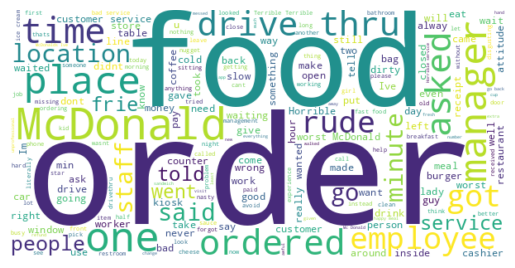

WORDCLOUD FOR RATING1


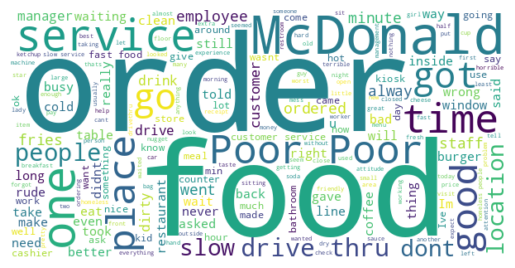

WORDCLOUD FOR RATING2


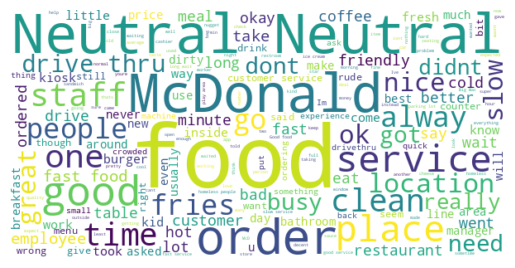

WORDCLOUD FOR RATING3


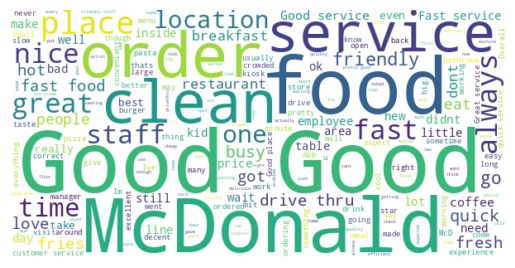

WORDCLOUD FOR RATING4


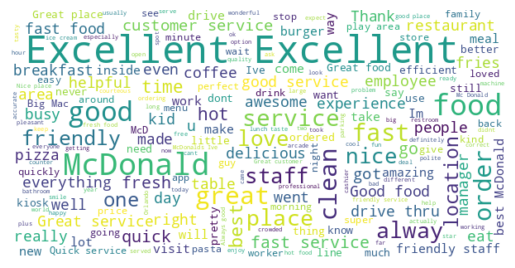

WORDCLOUD FOR RATING5


In [ ]:
for i in range(1, 6):
    textForWordCloud = ' '
    for index, row in df.iterrows():
        if row['rating'] == i:
            textForWordCloud += row['reviewForBERT'] + ' '
    createWordCloud(textForWordCloud)
    print(f'WORDCLOUD FOR RATING{i}')

In [ ]:
df.to_csv('topicModelling.csv', index = False)

In [ ]:
textForNGram = ""
stopWords = set(stopwords.words('english'))
for _,row in df.iterrows():
  for word in row['reviewForBERT'].split():
    if word not in stopWords:
      textForNGram += word + ' '

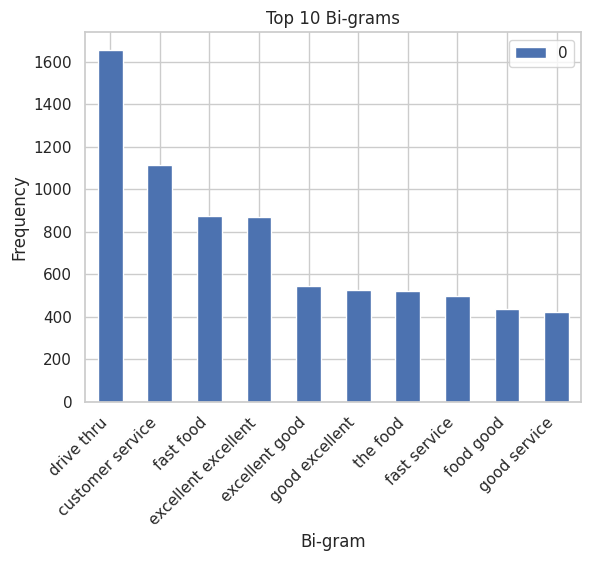

In [ ]:
# BI-GRAM ANALYSIS
vectorizer = CountVectorizer(ngram_range=(2, 2))
ngrams = vectorizer.fit_transform([textForNGram])
ngramsFreq = pd.DataFrame(ngrams.sum(axis=0), columns=vectorizer.get_feature_names_out()).T.sort_values(0, ascending=False)
top_10_bigrams = ngramsFreq.head(10)

# Plotting the top 10 trigrams
top_10_bigrams.plot(kind='bar')
plt.title('Top 10 Bi-grams')
plt.xlabel('Bi-gram')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequency')
plt.show()


<ipython-input-102-6e0a4d738252>:24: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for star_rating, top_bigrams in grouped.iteritems():


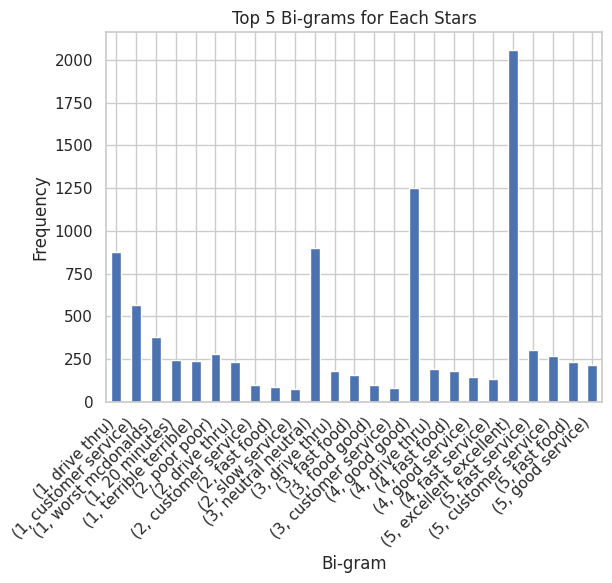

In [ ]:
# Function to remove stop words and get top bigrams
def get_top_bigrams(texts):
    text_for_ngram = ""
    stop_words = set(stopwords.words('english'))

    # Remove stop words for each review
    for review in texts:
        for word in review.split():
            if word.lower() not in stop_words:
                text_for_ngram += word + ' '

    # Get top bigrams
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    ngrams = vectorizer.fit_transform([text_for_ngram])
    ngrams_freq = pd.DataFrame(ngrams.sum(axis=0), columns=vectorizer.get_feature_names_out()).T.sort_values(0, ascending=False)
    top_10_bigrams = ngrams_freq.head(5)

    return top_10_bigrams

# Apply the function to each star rating group
grouped = df.groupby('rating')['reviewForBERT'].apply(lambda x: get_top_bigrams(x))

# Plotting the top 5 bigrams for each group
for star_rating, top_bigrams in grouped.iteritems():
    top_bigrams.plot(kind='bar')
    plt.title(f'Top 5 Bi-grams for Each Stars')
    plt.xlabel('Bi-gram')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Frequency')
    plt.show()


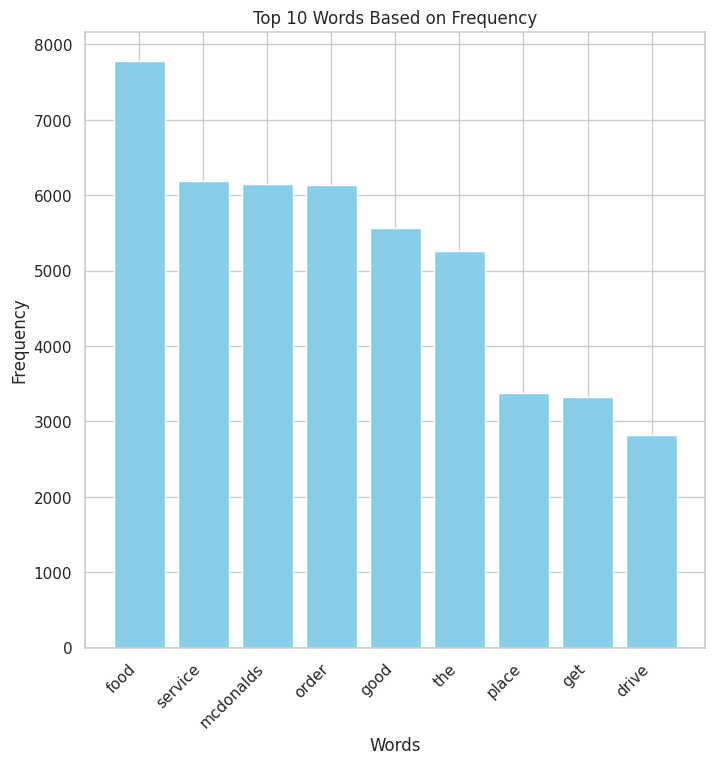

In [ ]:
def getTopWords(text, topN):
    words = re.findall(r'\b\w+\b', text.lower())
    wordCounts = Counter(words)
    topWords = wordCounts.most_common(topN)
    return topWords

topWords = getTopWords(textForNGram,10)

words, frequencies = zip(*topWords)
words, frequencies = words[1:], frequencies[1:]

# Plot the top words
plt.figure(figsize=(8, 8))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 Words Based on Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):

    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

df['vaderSentiment'] = df['cleanReview'].apply(sentiment_scores)

# Display the updated dataframe
df.head()

,review,rating,cleanReview,reviewForBERT,vaderSentiment
0,Why does it look like someone spit on my food?...,1,whi doe look like someon spit food normal tran...,Why does it look like someone spit on my food\...,0.5541
1,It'd McDonalds. It is what it is as far as the...,4,itd mcdonald far food atmospher go staff doe m...,Itd McDonalds It is what it is as far as the f...,0.7003
2,Made a mobile order got to the speaker and che...,1,made mobil order got speaker check line wa mov...,Made a mobile order got to the speaker and che...,-0.2500
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,mc crispi chicken sandwich wa custom servic wa...,My mc Crispy chicken sandwich was customer se...,0.0000
4,"I repeat my order 3 times in the drive thru, a...",1,repeat order 3 time drive thru still manag mes...,I repeat my order 3 times in the drive thru an...,-0.7184


In [ ]:
def textClassification(text):
  if text >= 0.05:
    return('positive')
  if text <= -0.05:
    return('negative')
  return('neutral')

df['vaderSentimentClassification'] = df['vaderSentiment'].apply(textClassification)

In [ ]:
df[['rating','cleanReview', 'vaderSentiment','vaderSentimentClassification']].to_csv('delete.csv', index = False)

In [ ]:
df.vaderSentimentClassification.value_counts()

positive    17856
neutral      8849
negative     6691
Name: vaderSentimentClassification, dtype: int64

In [ ]:
df['vaderSentiment'].iloc[2] <= -0.05

True

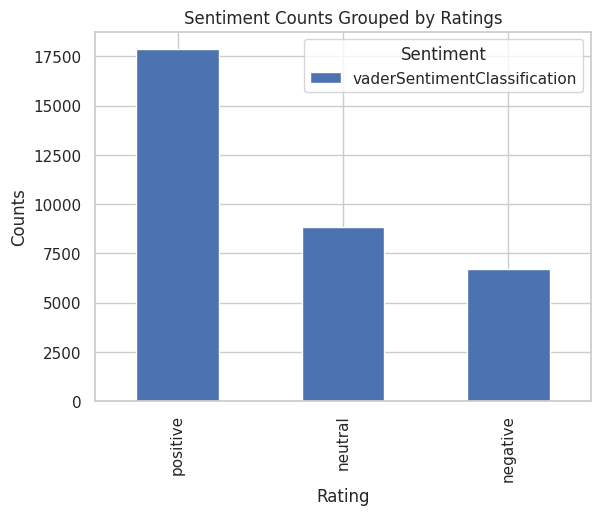

In [ ]:
sentimentCounts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Sentiment Counts Grouped by Ratings')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.legend(title='Sentiment')
plt.show()

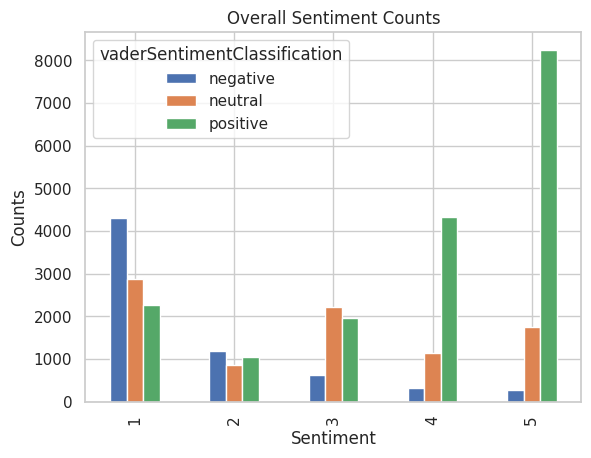

In [ ]:
sentimentCounts = df['vaderSentimentClassification'].value_counts()
groupedSentiments = df.groupby(['rating', 'vaderSentimentClassification']).size().unstack().fillna(0)

groupedSentiments.plot(kind='bar')
plt.title('Overall Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()


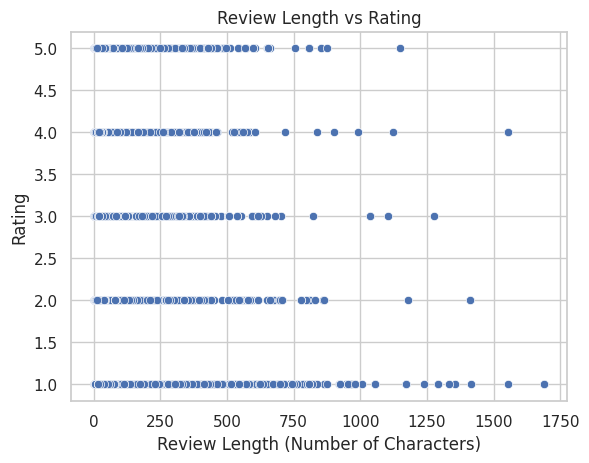

In [ ]:
df['review_length'] = df['cleanReview'].apply(lambda x: len(str(x)))
sns.scatterplot(x='review_length', y='rating', data=df)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Rating')
plt.show()

In [ ]:
temp = pd.read_csv('senimentsBertAllThree.csv')

In [ ]:
temp.head()

,Unnamed: 0,0
0,0,[0.9752794 0.02260427 0.00211631]
1,1,[0.00268567 0.02331932 0.97399503]
2,2,[0.7752055 0.21287917 0.01191532]
3,3,[0.00576835 0.09304767 0.90118396]
4,4,[0.92126226 0.07193809 0.00679967]


In [ ]:
temp.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
temp.head()

,0
0,[0.9752794 0.02260427 0.00211631]
1,[0.00268567 0.02331932 0.97399503]
2,[0.7752055 0.21287917 0.01191532]
3,[0.00576835 0.09304767 0.90118396]
4,[0.92126226 0.07193809 0.00679967]


In [ ]:
temp.rename(columns={'0':'all'}, inplace = True)

In [ ]:
def convertToList(dataStr):
  if type(dataStr) == str:
    numberStr = dataStr.strip("[]")
    return [float(num) for num in numberStr.split()]

In [ ]:
res = []
res.append(temp['all'].apply(convertToList))

In [ ]:
val1, val2, val3 =[],[],[]
for i in range(len(res[0])):
    if res[0][i]:
        val1.append(res[0][i][0])
        val2.append(res[0][i][1])
        val3.append(res[0][i][2])

In [ ]:
# DROPPING 7 ROWS FOR WHICH WE WERE UNABLE TO GET BERT SENTIMENTS
list(temp.loc[pd.isna(temp["all"]), :].index)

[17316, 23021, 23156, 23689, 27955, 28090, 28803]

In [ ]:
dfForBERT = df.drop(list(temp.loc[pd.isna(temp["all"]), :].index))

In [ ]:
len(dfForBERT)

33389

In [ ]:
dfForBERT['negativeSentiment'] = val1
dfForBERT['neutralSentiment'] = val2
dfForBERT['positiveSentiment'] = val3

In [ ]:
def determineSentiment(row):
    if row['negativeSentiment'] > max(row['neutralSentiment'], row['positiveSentiment']):
        return 'negative'
    elif row['positiveSentiment'] > max(row['neutralSentiment'], row['negativeSentiment']):
        return 'positive'
    else:
        return 'neutral'

dfForBERT['BERTSentiment'] = dfForBERT.apply(determineSentiment, axis=1)

# Display the updated DataFrame
dfForBERT.head()

,review,rating,cleanReview,reviewForBERT,vaderSentiment,vaderSentimentClassification,review_length,negativeSentiment,neutralSentiment,positiveSentiment,BERTSentiment
0,Why does it look like someone spit on my food?...,1,whi doe look like someon spit food normal tran...,Why does it look like someone spit on my food\...,0.5541,positive,154,0.975279,0.022604,0.002116,negative
1,It'd McDonalds. It is what it is as far as the...,4,itd mcdonald far food atmospher go staff doe m...,Itd McDonalds It is what it is as far as the f...,0.7003,positive,128,0.002686,0.023319,0.973995,positive
2,Made a mobile order got to the speaker and che...,1,made mobil order got speaker check line wa mov...,Made a mobile order got to the speaker and che...,-0.2500,negative,193,0.775205,0.212879,0.011915,negative
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,mc crispi chicken sandwich wa custom servic wa...,My mc Crispy chicken sandwich was customer se...,0.0000,neutral,54,0.005768,0.093048,0.901184,positive
4,"I repeat my order 3 times in the drive thru, a...",1,repeat order 3 time drive thru still manag mes...,I repeat my order 3 times in the drive thru an...,-0.7184,negative,188,0.921262,0.071938,0.006800,negative


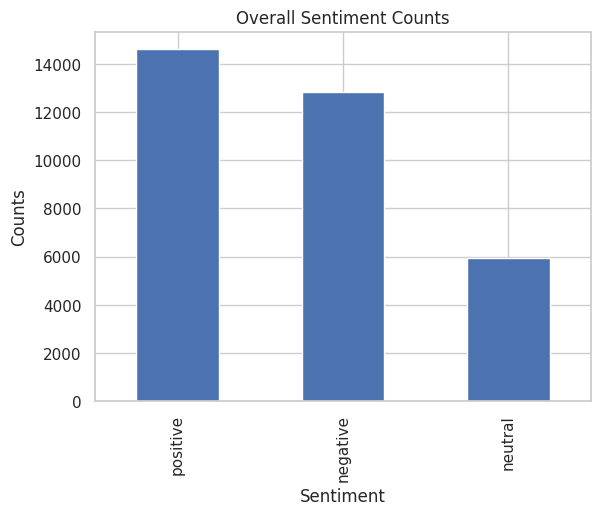

In [ ]:
sentimentCounts = dfForBERT['BERTSentiment'].value_counts()
groupedSentiments = dfForBERT.groupby(['rating', 'BERTSentiment']).size().unstack().fillna(0)

sentimentCounts.plot(kind='bar')
plt.title('Overall Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()


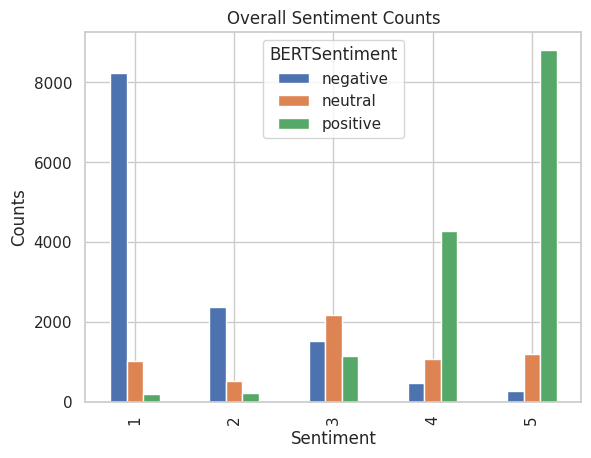

In [ ]:
groupedSentiments.plot(kind='bar',ax=plt.gca())
plt.title('Overall Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show()

In [ ]:
dfForBERT['vaderSentimentClassification'].value_counts()

positive    17850
neutral      8849
negative     6690
Name: vaderSentimentClassification, dtype: int64

In [ ]:
dfForBERT['BERTSentiment'].value_counts()

positive    14605
negative    12839
neutral      5945
Name: BERTSentiment, dtype: int64

In [ ]:
dfForBERT[dfForBERT['rating'] == 1]['BERTSentiment'].value_counts()

negative    8243
neutral     1005
positive     180
Name: BERTSentiment, dtype: int64

In [ ]:
mismatched_data = dfForBERT[dfForBERT['vaderSentimentClassification'] != dfForBERT['BERTSentiment']]
mismatched_data = mismatched_data[mismatched_data['rating']==1]
# Selecting 5 to 10 samples from the mismatched data
sampled_mismatched_data = mismatched_data.sample(n=10, random_state=1)

sampled_mismatched_data[['rating', 'reviewForBERT', 'vaderSentimentClassification', 'BERTSentiment']]


,rating,reviewForBERT,vaderSentimentClassification,BERTSentiment
241,1,Not open 24 hours Only the drivethru Dining ro...,neutral,negative
7761,1,As we walk in a girl behind the counter identi...,positive,negative
10687,1,I cant seriously believe this place is still i...,positive,negative
15287,1,I love McDonalds but in this one I have had th...,neutral,negative
10863,1,Always out of nearly everything regardless of ...,positive,negative
25349,1,Newly removed You would think this place woul...,positive,negative
32273,1,I went today to get food and they said two tim...,positive,negative
24740,1,This location is NOT open 24 hours Please adju...,neutral,negative
8029,1,Terrible customer service and no juice for the...,neutral,negative
21823,1,Its breakfast sandwiches are human meat,neutral,negative


##  NULL HYPOTHESIS: The average of negative sentiment scores with 1-star rating is equal to average of negative sentiment scores of 2-star rating and above.

## ALTERNATE HYPOTHESIS: The average of negative sentiment scores with 1-star rating is greater than the average of negative sentiment scores of 2-star rating and above.


In [ ]:
groupedOneStar = dfForBERT[dfForBERT['rating'] == 1]['negativeSentiment']
groupedAboveOneStar = dfForBERT[dfForBERT['rating'] != 1]['negativeSentiment']

statistic, p_value = stats.mannwhitneyu(groupedOneStar, groupedAboveOneStar, alternative='greater')

print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
    print("Accept alternate hypothesis \"The average of negative sentiment scores with 1-star rating is greater than the average of negative sentiment scores of 2-star rating and above.\"")
else:
    print("Fail to reject the null hypothesis. The average of negative sentiment scores with 1-star rating is equal to average of negative sentiment scores of 2-star rating and above.")

Mann-Whitney U Statistic: 206162428.5
P-value: 0.0
Reject the null hypothesis
Accept alternate hypothesis "The average of negative sentiment scores with 1-star rating is greater than the average of negative sentiment scores of 2-star rating and above."


##  NULL HYPOTHESIS: The average of negative sentiment scores with 1-star rating is equal to average of negative sentiment scores of 2-star rating.

## ALTERNATE HYPOTHESIS: The average of negative sentiment scores with 1-star rating is greater than the average of negative sentiment scores of 2-star rating.


In [ ]:
groupedOneStar = dfForBERT[dfForBERT['rating'] == 1]['negativeSentiment']
groupedATwoStar = dfForBERT[dfForBERT['rating'] == 2]['negativeSentiment']

statistic, p_value = stats.mannwhitneyu(groupedOneStar, groupedATwoStar, alternative='greater')

print("Mann-Whitney U Statistic:", statistic)
print("P-value:", p_value)

# Decide whether to reject the null hypothesis
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("Accept alternate hypothesis \"The average of negative sentiment scores with 1-star rating is greater than the average of negative sentiment scores of 2-star rating.\"")
else:
    print("Fail to reject the null hypothesis. The average of negative sentiment scores with 1-star rating is equal to average of negative sentiment scores of 2-star rating.")

Mann-Whitney U Statistic: 19446270.5
P-value: 3.987120594260143e-175
Reject the null hypothesis
Accept alternate hypothesis "The average of negative sentiment scores with 1-star rating is greater than the average of negative sentiment scores of 2-star rating."
